In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="0"
import matplotlib.pyplot as plt
from PIL import Image
import requests
from io import BytesIO
import torch

from data.load_datasets import *
import models.model_parameters as params
from experiment._evaluation_one_img import make_prediction

In [4]:
# DataLoader
loader = torch.utils.data.DataLoader(
    CaptionDataset(params.data_folder, params.data_name, 'TEST'),
    batch_size=1, 
    shuffle=True,
    num_workers=1, 
    pin_memory=torch.cuda.is_available())

checkpoint = 'BEST_checkpoint_4_preprocessed_coco.pth.tar'

In [7]:
url, image_features, caps, caplens, attributes, allcaps = next(iter(loader))
gt_caps, preds, eval_met = make_prediction(image_features, caps, caplens, attributes, allcaps, checkpoint)

GT_cap 0: a bride and groom are cutting into their wedding cake
GT_cap 1: a man holding a womans hand and cutting a wedding cake together
GT_cap 2: a newlywed couple cutting the first slice from their wedding cake
GT_cap 3: a young married couple cuts their wedding cake
GT_cap 4: the couple is cutting the cake to share with guests

Prediction: a man and woman cutting a wedding cake
Performance
BLEU-1: 87.5000
BLEU-2: 70.7107
BLEU-3: 55.0321
BLEU-4: 42.7287
METEOR: 27.9355
ROUGE_L: 67.5633


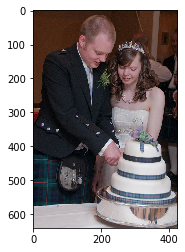

In [8]:
plt.imshow(Image.open(BytesIO(requests.get(url[0]).content)))

for i, gt_cap in enumerate(gt_caps[0]):
    print("GT_cap {}: {}".format(i, gt_cap))

print("\nPrediction: {}".format(preds[0]))

print("Performance")
print("BLEU-1: {0:.4f}".format(eval_met['Bleu_1']*100))
print("BLEU-2: {0:.4f}".format(eval_met['Bleu_2']*100))
print("BLEU-3: {0:.4f}".format(eval_met['Bleu_3']*100))
print("BLEU-4: {0:.4f}".format(eval_met['Bleu_4']*100))
print("METEOR: {0:.4f}".format(eval_met['METEOR']*100))
print("ROUGE_L: {0:.4f}".format(eval_met['ROUGE_L']*100))